In [1]:
from skimage.transform import rescale, resize
from skimage import color 
from skimage.io import imread, imsave
import matplotlib.pyplot as plt 
from skimage import io, transform
import os
import cv2
from matplotlib import image
import matplotlib.image as mpimg
import random
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns 
from matplotlib import animation, rc
rc('animation', html='jshtml')

from keras.preprocessing.image import ImageDataGenerator, load_img 
from keras import optimizers
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# Load and show an image in pillow
from PIL import Image
import os, os.path



/tmp/ipykernel_41276/1353447359.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-01 15:09:04.403133: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-01 15:09:04.438320: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 15:0

In [2]:
train_list = glob('/home/kkyu/amr_ws/DL/data/shape_figure/train/*')
train_list

['/home/kkyu/amr_ws/DL/data/shape_figure/train/star_27.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/tri_62.png',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/star_799.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/rec_666.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/cir_428.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/rec_1000036.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/tri_539.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/cir_1000029.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/tri_38.png',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/rec_44.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/tri_514.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/star_49.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/tri_530.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/cir_7.jpg',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/cir_053.png',
 '/home/kkyu/amr_ws/DL/data/shape_figure/train/star_23.jpg',
 '/home/kkyu/amr_ws/

### gray image

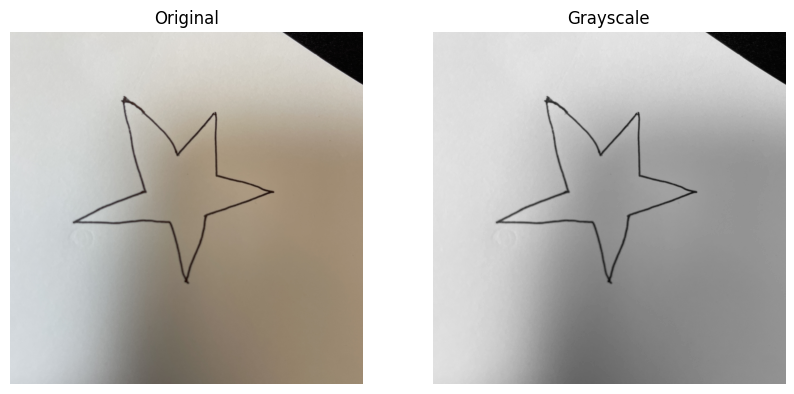

In [3]:
def convert_to_gray(image_path):
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img

image_path = train_list[0]
gray_image = convert_to_gray(image_path)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

original_image = cv2.imread(image_path)
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(gray_image, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')

plt.show()


### canny image

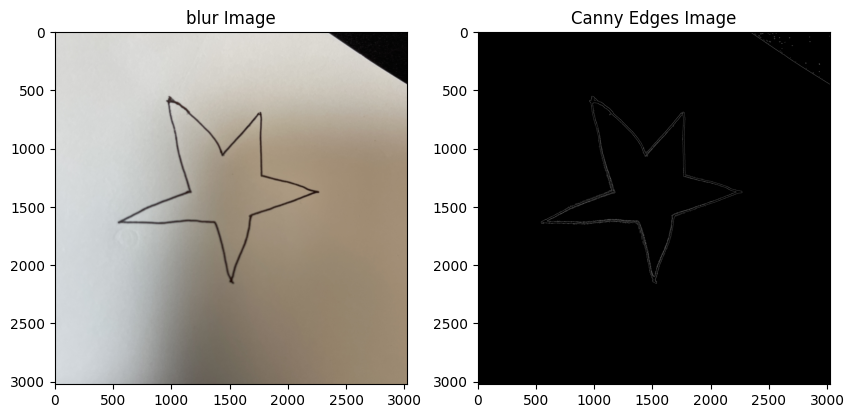

In [4]:
image = io.imread(train_list[0])
image_blur = cv2.blur(image, (5, 5))

gray_image = cv2.cvtColor(image_blur, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray_image, 30, 60)  

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('blur Image')
plt.imshow(image_blur)
plt.subplot(1, 2, 2)
plt.title('Canny Edges Image')
plt.imshow(edges, cmap='gray')
plt.show()


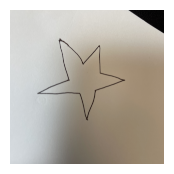

(3024, 3024, 3)


In [5]:
image = io.imread(train_list[0])

plt.figure(figsize=(2,2))
plt.imshow(image)
plt.axis('off')
plt.show()

print(image.shape)


### class_names[label]

In [6]:
directory = '/home/kkyu/amr_ws/DL/data/shape_figure/train'
file_names = os.listdir(directory)

labels = []
for file_name in file_names:
    label = file_name.split('_')[0] 
    labels.append(label)

labels = list(set(labels))

labels

['star', 'tri', 'cir', 'rec']

### original random 6 images

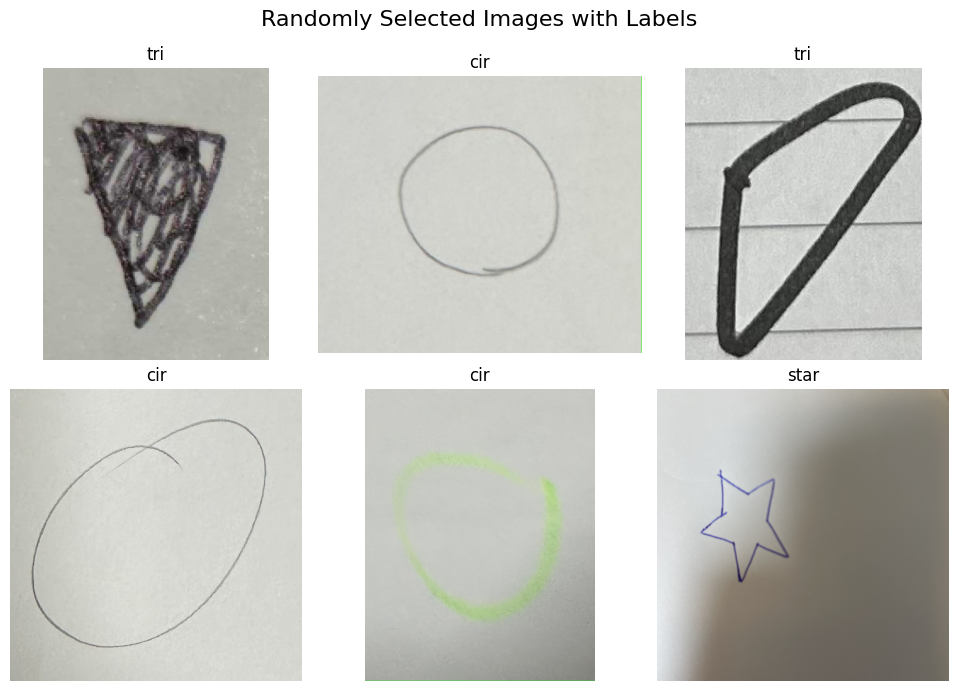

In [7]:
# 데이터에서 무작위로 6개의 이미지 선택
random_images = random.sample(file_names, 6)

# 2x3 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
fig.suptitle('Randomly Selected Images with Labels', fontsize=16)

for i, image_file in enumerate(random_images):
    # 이미지 파일 경로
    image_path = os.path.join(directory, image_file)
    
    # 이미지를 불러와서 서브플롯에 표시
    img = mpimg.imread(image_path)
    ax = axes[i//3, i%3]
    ax.imshow(img)
    ax.axis('off')  # 눈금 제거
    ax.set_title(image_file.split('_')[0])  

plt.tight_layout()
plt.show()

### canny edge random 6 image

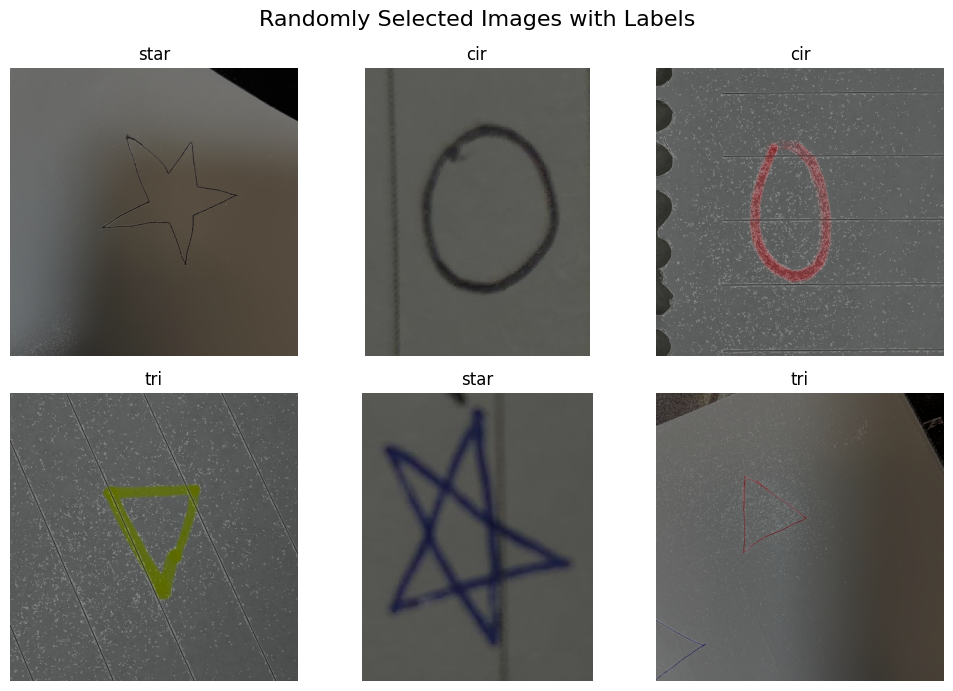

In [8]:
random_images = random.sample(file_names, 6)

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
fig.suptitle('Randomly Selected Images with Labels', fontsize=16)

for i, image_file in enumerate(random_images):
    image_path = os.path.join(directory, image_file)
    
    img = mpimg.imread(image_path)
    ax = axes[i//3, i%3]
    ax.imshow(img)
    ax.axis('off')  # 눈금 제거
    ax.set_title(image_file.split('_')[0])  

    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    if img_gray.dtype != 'uint8':
        img_gray = img_gray.astype('uint8')

    edges = cv2.Canny(img_gray, 50, 70)  
    ax.imshow(edges, cmap='gray', alpha=0.5)  

plt.tight_layout()
plt.show()


### train_data
    - cir / rec / star / tri => label 생성
    - dataframe

In [9]:
train_df = pd.DataFrame({"file" : os.listdir("/home/kkyu/amr_ws/DL/data/shape_figure/train")})
train_df["label"] = train_df["file"].apply(lambda x: x.split(".")[0])
train_df["label"] = train_df["label"].str.split("_").str.get(0)

train_df

,file,label
0,star_27.jpg,star
1,tri_62.png,tri
2,star_799.jpg,star
3,rec_666.jpg,rec
4,cir_428.jpg,cir
...,...,...
976,cir_435.jpg,cir
977,tri_540.jpg,tri
978,tri_01.png,tri
979,cir_27.jpg,cir


### test_data
    - cir / rec / star / tri => label 생성
    - dataframe

In [10]:
test_df = pd.DataFrame({"file": os.listdir("/home/kkyu/amr_ws/DL/data/shape_figure/test")})
test_df["label"] = test_df["file"].apply(lambda x: x.split(".")[0])
test_df["label"] = test_df["label"].str.split("_").str.get(0)

test_df


,file,label
0,tri_1013.png,tri
1,star_07.jpg,star
2,cir_1099.jpg,cir
3,cir_10111.jpg,cir
4,cir_1070.png,cir
...,...,...
467,rec_068.png,rec
468,star_021.jpg,star
469,tri_1010.png,tri
470,rec_026.jpg,rec


In [11]:
img_height = 64
img_width = 64
batch_size = 32

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# train_df와 test_df는 각각 훈련 및 테스트 데이터의 파일 경로 및 레이블을 포함하는 데이터프레임입니다.

train_files = "/home/kkyu/amr_ws/DL/data/shape_figure/train"
train_data_gen = ImageDataGenerator(rescale=1./255)
train_data = train_data_gen.flow_from_dataframe(dataframe=train_df,
                                                directory=train_files,
                                                x_col="file",
                                                y_col="label",
                                                target_size=(img_height, img_width),
                                                batch_size = 64,
                                                class_mode='categorical',
                                                shuffle=True)

test_files = "/home/kkyu/amr_ws/DL/data/shape_figure/test"
test_df['label'] = test_df['label'].astype(str)
test_data_gen = ImageDataGenerator(rescale=1./255)
test_data = test_data_gen.flow_from_dataframe(dataframe=test_df,
                                              directory=test_files,
                                              x_col="file",
                                              y_col="label",
                                              target_size=(img_height, img_width),
                                              batch_size=16,
                                              class_mode='categorical',
                                              shuffle=False)


Found 981 validated image filenames belonging to 4 classes.
Found 472 validated image filenames belonging to 4 classes.


In [13]:
# class_indices를 출력하면, 해당 열의 클래스 명을 알려 줍니다
train_data.class_indices

{'cir': 0, 'rec': 1, 'star': 2, 'tri': 3}

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D, Activation
import tensorflow as tf

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (64, 64 ,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(4, activation = "softmax"))


2024-03-01 15:09:15.177000: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-01 15:09:15.242359: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-01 15:09:15.242800: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [15]:
batch_size=256
epochs=30

In [16]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [17]:
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 96)          0

In [18]:
history = model.fit(train_data, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=test_data,callbacks=callbacks)

Epoch 1/30


2024-03-01 15:09:18.171836: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-01 15:09:18.574086: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd378915780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-01 15:09:18.574104: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-03-01 15:09:18.578832: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709273358.659995   41348 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 [==============================] - ETA: 0s - loss: 1.3520 - accuracy: 0.3129
Epoch 1: val_loss improved from inf to 1.32204, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets


INFO:tensorflow:Assets written to: ./base.model/assets


16/16 [==============================] - 16s 831ms/step - loss: 1.3520 - accuracy: 0.3129 - val_loss: 1.3220 - val_accuracy: 0.4492 - lr: 0.0010
Epoch 2/30
16/16 [==============================] - ETA: 0s - loss: 1.1387 - accuracy: 0.4954
Epoch 2: val_loss improved from 1.32204 to 1.12158, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets


INFO:tensorflow:Assets written to: ./base.model/assets


16/16 [==============================] - 12s 766ms/step - loss: 1.1387 - accuracy: 0.4954 - val_loss: 1.1216 - val_accuracy: 0.5699 - lr: 0.0010
Epoch 3/30
16/16 [==============================] - ETA: 0s - loss: 0.9862 - accuracy: 0.5770
Epoch 3: val_loss improved from 1.12158 to 0.88361, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets


INFO:tensorflow:Assets written to: ./base.model/assets


16/16 [==============================] - 13s 836ms/step - loss: 0.9862 - accuracy: 0.5770 - val_loss: 0.8836 - val_accuracy: 0.6462 - lr: 0.0010
Epoch 4/30
16/16 [==============================] - ETA: 0s - loss: 0.8290 - accuracy: 0.6412
Epoch 4: val_loss did not improve from 0.88361
16/16 [==============================] - 12s 800ms/step - loss: 0.8290 - accuracy: 0.6412 - val_loss: 0.9388 - val_accuracy: 0.6547 - lr: 0.0010
Epoch 5/30
16/16 [==============================] - ETA: 0s - loss: 0.7540 - accuracy: 0.6922
Epoch 5: val_loss improved from 0.88361 to 0.64356, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets


INFO:tensorflow:Assets written to: ./base.model/assets


16/16 [==============================] - 13s 833ms/step - loss: 0.7540 - accuracy: 0.6922 - val_loss: 0.6436 - val_accuracy: 0.7606 - lr: 0.0010
Epoch 6/30
16/16 [==============================] - ETA: 0s - loss: 0.6321 - accuracy: 0.7288
Epoch 6: val_loss improved from 0.64356 to 0.59229, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets


INFO:tensorflow:Assets written to: ./base.model/assets


16/16 [==============================] - 13s 852ms/step - loss: 0.6321 - accuracy: 0.7288 - val_loss: 0.5923 - val_accuracy: 0.7945 - lr: 0.0010
Epoch 7/30
16/16 [==============================] - ETA: 0s - loss: 0.5225 - accuracy: 0.7829
Epoch 7: val_loss improved from 0.59229 to 0.50801, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets


INFO:tensorflow:Assets written to: ./base.model/assets


16/16 [==============================] - 13s 850ms/step - loss: 0.5225 - accuracy: 0.7829 - val_loss: 0.5080 - val_accuracy: 0.8157 - lr: 0.0010
Epoch 8/30
16/16 [==============================] - ETA: 0s - loss: 0.4335 - accuracy: 0.8257
Epoch 8: val_loss improved from 0.50801 to 0.49775, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets


INFO:tensorflow:Assets written to: ./base.model/assets


16/16 [==============================] - 14s 878ms/step - loss: 0.4335 - accuracy: 0.8257 - val_loss: 0.4977 - val_accuracy: 0.8538 - lr: 0.0010
Epoch 9/30
16/16 [==============================] - ETA: 0s - loss: 0.3713 - accuracy: 0.8471
Epoch 9: val_loss did not improve from 0.49775
16/16 [==============================] - 11s 717ms/step - loss: 0.3713 - accuracy: 0.8471 - val_loss: 0.5653 - val_accuracy: 0.8369 - lr: 0.0010
Epoch 10/30
16/16 [==============================] - ETA: 0s - loss: 0.3168 - accuracy: 0.8797
Epoch 10: val_loss did not improve from 0.49775
16/16 [==============================] - 12s 762ms/step - loss: 0.3168 - accuracy: 0.8797 - val_loss: 0.5227 - val_accuracy: 0.8411 - lr: 0.0010
Epoch 11/30
16/16 [==============================] - ETA: 0s - loss: 0.3085 - accuracy: 0.8716
Epoch 11: val_loss did not improve from 0.49775

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
16/16 [==============================] - 12s 737ms/step - l

INFO:tensorflow:Assets written to: ./base.model/assets


16/16 [==============================] - 12s 786ms/step - loss: 0.2803 - accuracy: 0.8879 - val_loss: 0.4337 - val_accuracy: 0.8602 - lr: 1.0000e-04
Epoch 13/30
16/16 [==============================] - ETA: 0s - loss: 0.2045 - accuracy: 0.9358
Epoch 13: val_loss did not improve from 0.43368
16/16 [==============================] - 11s 694ms/step - loss: 0.2045 - accuracy: 0.9358 - val_loss: 0.4592 - val_accuracy: 0.8602 - lr: 1.0000e-04
Epoch 14/30
16/16 [==============================] - ETA: 0s - loss: 0.1827 - accuracy: 0.9439
Epoch 14: val_loss did not improve from 0.43368
16/16 [==============================] - 11s 699ms/step - loss: 0.1827 - accuracy: 0.9439 - val_loss: 0.4781 - val_accuracy: 0.8686 - lr: 1.0000e-04
Epoch 15/30
16/16 [==============================] - ETA: 0s - loss: 0.1673 - accuracy: 0.9470
Epoch 15: val_loss did not improve from 0.43368

Epoch 15: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
16/16 [==============================] - 11s 

In [33]:
pred=model.predict(test_data).argmax(axis=1)  #argmax takes the max probaility 
pred

30/30 [==============================] - 3s 106ms/step


array([3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 1, 1,
       2, 1, 1, 2, 3, 3, 0, 1, 0, 3, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 2, 0,
       1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 3, 0, 1, 3, 1, 0, 1, 2,
       0, 3, 0, 0, 0, 1, 3, 3, 1, 1, 2, 3, 3, 0, 1, 3, 0, 3, 1, 1, 3, 1,
       1, 3, 0, 1, 1, 1, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 3, 3, 1, 0, 3,
       0, 2, 3, 0, 2, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 1, 1, 0, 3, 0, 1, 0,
       1, 0, 2, 2, 0, 0, 3, 2, 1, 3, 3, 0, 3, 1, 0, 0, 3, 1, 0, 3, 1, 0,
       3, 3, 1, 0, 0, 0, 3, 0, 1, 3, 2, 0, 3, 3, 2, 1, 3, 0, 1, 0, 1, 3,
       1, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 3, 0, 0, 3, 3, 0, 3, 1, 1, 0, 3,
       3, 1, 3, 3, 1, 0, 1, 3, 1, 1, 0, 3, 1, 3, 0, 0, 3, 1, 0, 3, 3, 1,
       0, 2, 0, 1, 3, 0, 1, 1, 0, 3, 1, 2, 0, 3, 3, 1, 3, 3, 2, 0, 1, 2,
       0, 0, 1, 0, 0, 3, 3, 0, 0, 2, 1, 0, 1, 3, 3, 0, 1, 3, 1, 0, 3, 0,
       3, 3, 2, 3, 3, 3, 3, 2, 0, 3, 1, 0, 3, 0, 3, 0, 0, 3, 0, 2, 1, 1,
       2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 3,

In [34]:
img = cv2.imread('/home/kkyu/amr_ws/DL/data/shape_figure/train/cir_404.jpg')
img = cv2.resize(img,(64,64))
img = img/255.0
img = img.reshape(-1,64,64,3)

np.round(model.predict(img)).argmax(axis=1)

1/1 [==============================] - 0s 31ms/step


array([0])

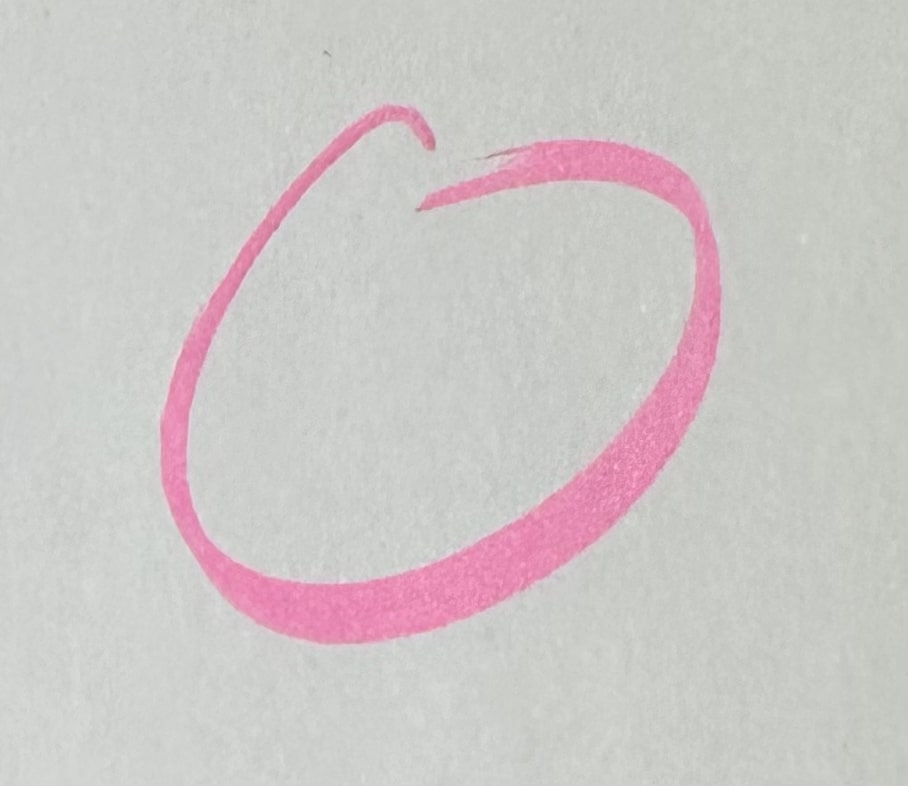

In [35]:
load_img('/home/kkyu/amr_ws/DL/data/shape_figure/train/cir_404.jpg')

In [36]:
train_data.class_indices

{'cir': 0, 'rec': 1, 'star': 2, 'tri': 3}

In [37]:
pred=model.predict(test_data)

30/30 [==============================] - 3s 102ms/step


In [38]:
predicted_classes=np.argmax(pred,axis=1)

In [39]:
true_classes=test_data.classes
class_labels=list(test_data.class_indices.keys())

In [40]:
report=classification_report(true_classes,predicted_classes,target_names=class_labels)
print(report)

              precision    recall  f1-score   support

         cir       0.85      0.93      0.89       142
         rec       0.90      0.87      0.89       139
        star       0.82      0.71      0.76        51
         tri       0.89      0.89      0.89       140

    accuracy                           0.88       472
   macro avg       0.87      0.85      0.86       472
weighted avg       0.88      0.88      0.87       472



In [41]:
confusion_matrix(predicted_classes,true_classes)

array([[132,  14,   2,   7],
       [  6, 121,   5,   2],
       [  0,   1,  36,   7],
       [  4,   3,   8, 124]])

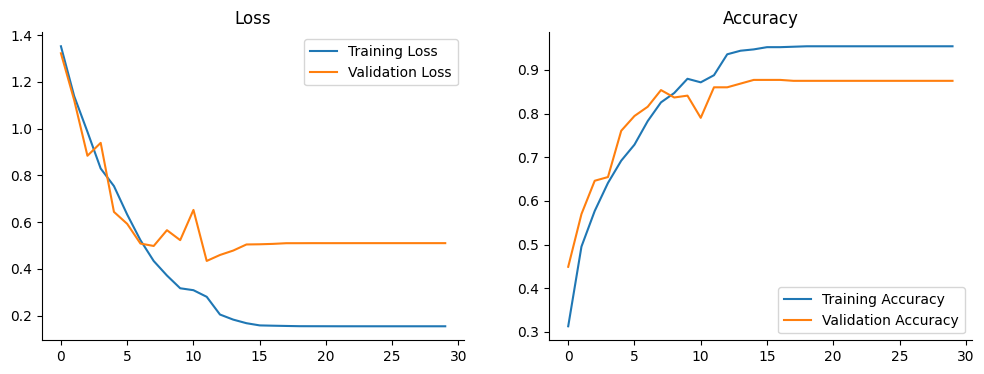

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history['loss'])),
             y = history.history['loss'], ax = axes[0],
             label = "Training Loss")
sns.lineplot(x = range(len(history.history["loss"])),
             y = history.history["val_loss"], ax = axes[0],
             label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])),
             y = history.history["accuracy"], ax = axes[1],
             label = "Training Accuracy")
sns.lineplot(x = range(len(history.history["accuracy"])),
             y = history.history["val_accuracy"], ax = axes[1],
             label = "Validation Accuracy")

axes[0].set_title("Loss")
axes[1].set_title("Accuracy")

sns.despine()
plt.show()

In [43]:
# Data Augmentation 
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

### augmented image

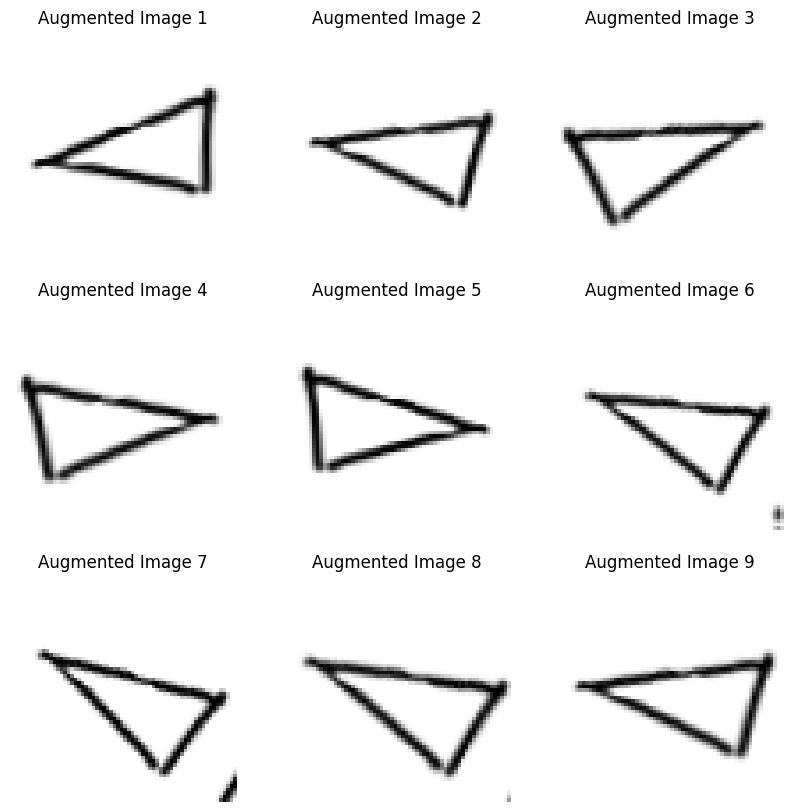

In [44]:
plt.figure(figsize=(10, 10))
images, _ = next(train_data)  # Get a batch of images
for i in range(9):
    augmented_images = data_augmentation(images)
    augmented_images = tf.image.convert_image_dtype(augmented_images, tf.uint8)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0])
    plt.title("Augmented Image {}".format(i+1))  
    plt.axis("off")
plt.show()


In [46]:
imgs = []
path = "/home/kkyu/amr_ws/DL/data/shape_figure/test/tri_10126.jpg"
valid_images = [ ".jpg",".JPG"]

# Loading the image
img = tf.keras.utils.load_img(
    path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 13ms/step
This image most likely belongs to rec with a 47.54 percent confidence.


#### Confusion matrix

In [49]:
batch_size = 16

val_pred = model.predict(test_data, steps=np.ceil(test_df.shape[0] / batch_size))
test_df["val_pred"] = np.argmax(val_pred, axis=1)

labels = {v: k for k, v in test_data.class_indices.items()}

test_df["val_pred"] = test_df["val_pred"].map(labels)

30/30 [==============================] - 3s 96ms/step


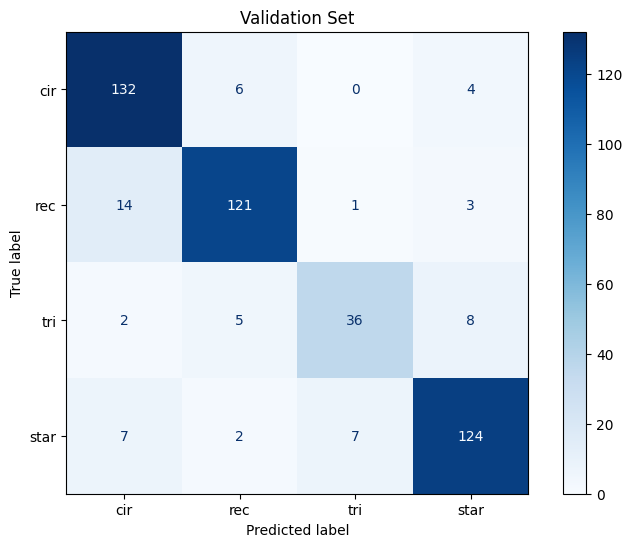

In [50]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize = (9, 6))

cm = confusion_matrix(test_df["label"], test_df["val_pred"])

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["cir", "rec", "tri", "star"])
disp.plot(cmap = plt.cm.Blues, ax = ax)

ax.set_title("Validation Set")
plt.show()